In [232]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Tourism and Air Travel in Lebanon

## Data

1. UNWTO
2. Global Aviation Dashboard


## Methodology

## Limitations

## Findings

In [233]:
data = pd.read_excel('../../data/aviation/daily_flights_to_and_from_syria.xlsx')

In [244]:
mena = pd.read_excel('../../data/aviation/mena_flights.xlsx')

In [249]:
inbound_flights_mena = mena[mena['destination_country']=='Lebanon']
inbound_flights_mena['date'] = inbound_flights_mena['date'].apply(lambda x: pd.to_datetime(x))
inbound_flights_mena_monthly = inbound_flights_mena.groupby([pd.Grouper(key='date', freq='M'), 'destination_country', 'origin_country'])['total_flights', 'total_seats'].sum().reset_index()
inbound_flights_mena_yearly = inbound_flights_mena.groupby([pd.Grouper(key='date', freq='Y'), 'destination_country', 'origin_country'])['total_flights', 'total_seats'].sum().reset_index()

C:\Users\sahit\AppData\Local\Temp\ipykernel_4940\3034704259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbound_flights_mena['date'] = inbound_flights_mena['date'].apply(lambda x: pd.to_datetime(x))
C:\Users\sahit\AppData\Local\Temp\ipykernel_4940\3034704259.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  inbound_flights_mena_monthly = inbound_flights_mena.groupby([pd.Grouper(key='date', freq='M'), 'destination_country', 'origin_country'])['total_flights', 'total_seats'].sum().reset_index()
C:\Users\sahit\AppData\Local\Temp\ipykernel_4940\3034704259.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecat

In [234]:
inbound_flights = data[(data['destination_country']=='Lebanon')]
inbound_flights['date'] = inbound_flights['date'].apply(lambda x: pd.to_datetime(x))
inbound_flights_monthly = inbound_flights.groupby([pd.Grouper(key='date', freq='M'), 'destination_country', 'origin_country'])['total_flights', 'total_seats'].sum().reset_index()
inbound_flights_yearly = inbound_flights.groupby([pd.Grouper(key='date', freq='Y'), 'destination_country', 'origin_country'])['total_flights', 'total_seats'].sum().reset_index()

C:\Users\sahit\AppData\Local\Temp\ipykernel_4940\3703000052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inbound_flights['date'] = inbound_flights['date'].apply(lambda x: pd.to_datetime(x))
C:\Users\sahit\AppData\Local\Temp\ipykernel_4940\3703000052.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  inbound_flights_monthly = inbound_flights.groupby([pd.Grouper(key='date', freq='M'), 'destination_country', 'origin_country'])['total_flights', 'total_seats'].sum().reset_index()
C:\Users\sahit\AppData\Local\Temp\ipykernel_4940\3703000052.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list inste

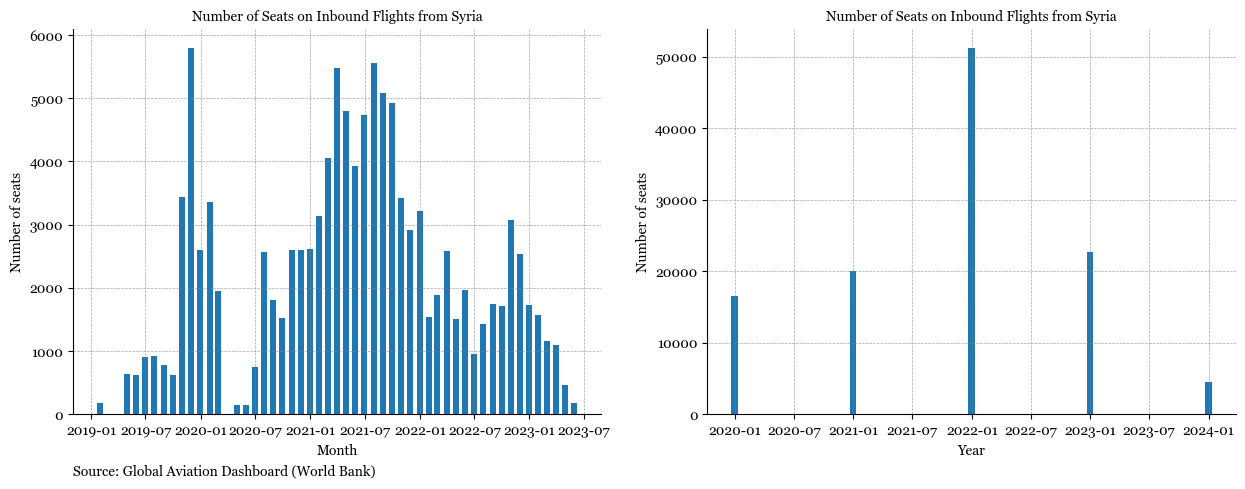

In [235]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt.rcParams["font.family"] = "Georgia"
# inbound_tourism.plot(ax=ax, label = 'Inbound Tourism')
# inbound_tourism_by_air.plot(ax=ax)

axs[0].bar(x=inbound_flights_monthly['date'], height = inbound_flights_monthly['total_seats'], width = 20)
axs[1].bar(x=inbound_flights_yearly['date'], height = inbound_flights_yearly['total_seats'], width = 20)


#legend_without_title = ax.legend(title=None, loc='upper left', frameon=False)

for ax in axs:
    # Hide the right and top spines (axis lines)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    ax.set_title('Number of Seats on Inbound Flights from Syria', font = 'Georgia')
    axs[0].set_xlabel('Month')
    axs[1].set_xlabel('Year')
    ax.set_ylabel('Number of seats')

subtitle = 'Source: Global Aviation Dashboard (World Bank)'
axs[0].text(0, -0.15, subtitle, ha='left', va='center', transform=axs[0].transAxes,
        fontsize=10, color='black', weight='normal');


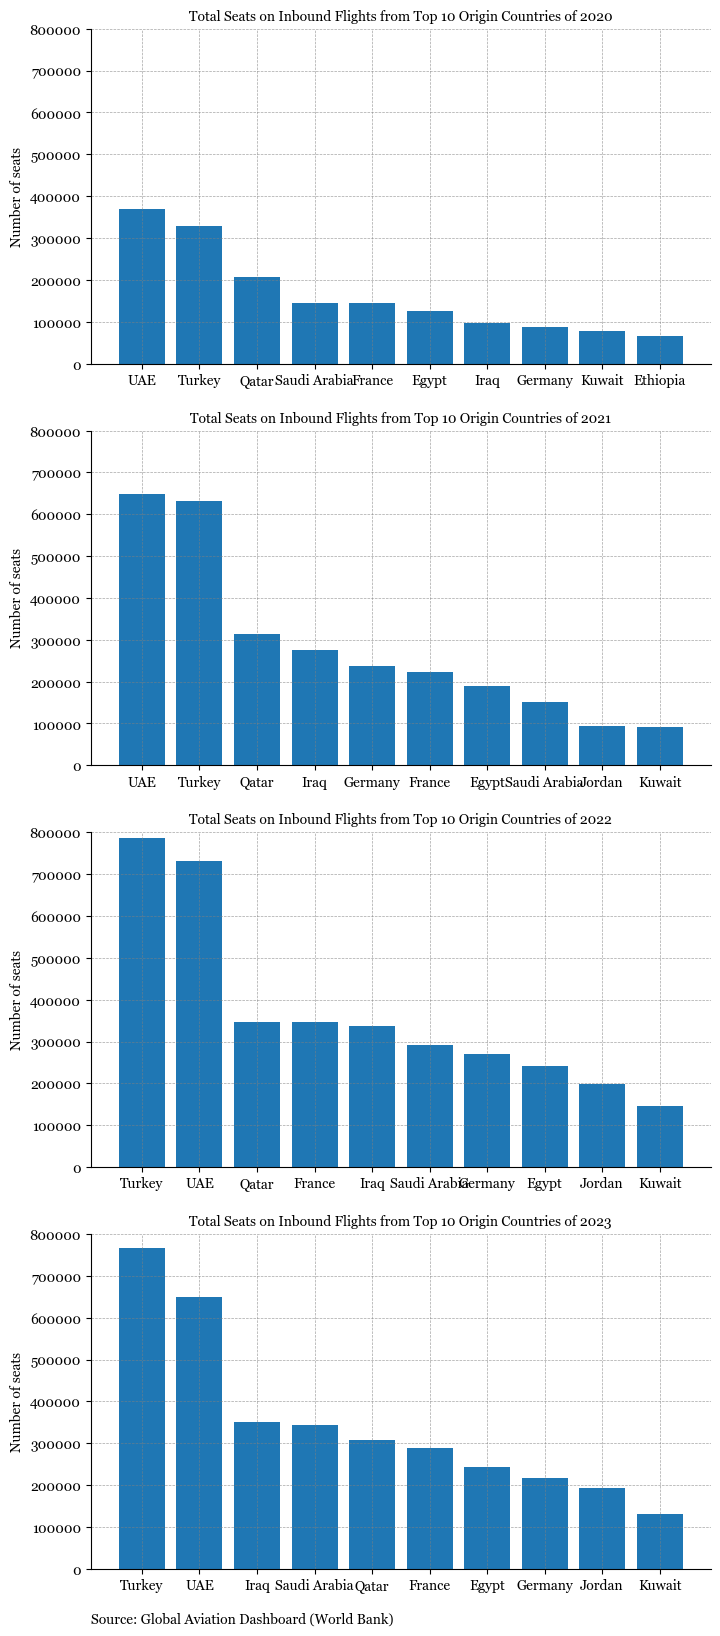

In [292]:
fig, axs = plt.subplots(4,1,figsize = (8,20))
ax = axs.flatten()

for idx, year in enumerate(range(2020,2024,1)):

    df = inbound_flights_mena_yearly[inbound_flights_mena_yearly['date'].dt.year==year].sort_values(by='total_seats', ascending = False).head(10)
    df['origin_country'].replace({'United Arab Emirates (the)':'UAE'}, inplace=True)

    ax[idx].bar(df['origin_country'], df['total_seats'] )

    ax[idx].set_ylim(top=800000)

        # Hide the right and top spines (axis lines)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax[idx].yaxis.set_ticks_position('left')
    ax[idx].xaxis.set_ticks_position('bottom')

    ax[idx].grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

    ax[idx].set_title(f'Total Seats on Inbound Flights from Top 10 Origin Countries of {year}', font = 'Georgia')
    # ax[2].set_xlabel('Origin Country')
    # ax[3].set_xlabel('Origin Country')
    ax[idx].set_ylabel('Number of seats')

subtitle = 'Source: Global Aviation Dashboard (World Bank)'
ax[3].text(0, -0.15, subtitle, ha='left', va='center', transform=ax[3].transAxes,
        fontsize=10, color='black', weight='normal');

In [236]:
inbound_tourism_overnight = pd.read_excel('../../data/aviation/All_Countries_Inbound_Tourism_1995_2021.xlsx', skiprows=5, sheet_name='1.2')
inbound_tourism_excursions = pd.read_excel('../../data/aviation/All_Countries_Inbound_Tourism_1995_2021.xlsx', skiprows=5, sheet_name='1.3')
inbound_tourism_cruise = pd.read_excel('../../data/aviation/All_Countries_Inbound_Tourism_1995_2021.xlsx', skiprows=5, sheet_name='1.4')

hotel_occupancy_guests = pd.read_excel('../../data/aviation/All_Countries_Inbound_Tourism_Accommodation_1995_2021.xlsx', skiprows=5, sheet_name = '1.31')
hotel_occupancy_overnights = pd.read_excel('../../data/aviation/All_Countries_Inbound_Tourism_Accommodation_1995_2021.xlsx', skiprows=5, sheet_name = '1.32')
inbound_tourism_by_nationality = pd.read_excel('../../data/aviation/Arrivals_NonResident_Tourists_by_Nationality_2017_2021.xlsx')

inbound_tourism_mode_of_transport = pd.read_excel('../../data/aviation/All_Countries_Arrival_Mode_of_Transport.xlsx', skiprows=5)
inbound_tourism_by_air = pd.read_excel('../../data/aviation/All_Countries_Arrival_Mode_of_Transport.xlsx', skiprows=5, sheet_name = '1.20')

In [237]:

hotel_occupancy_guests = hotel_occupancy_guests[hotel_occupancy_guests['COUNTRY']=='Lebanon']
hotel_occupancy_guests['COUNTRY'] = hotel_occupancy_guests['COUNTRY'].replace({'Lebanon':'Guests'})
hotel_occupancy_overnights = hotel_occupancy_overnights[hotel_occupancy_overnights['COUNTRY']=='Lebanon']
hotel_occupancy_overnights['COUNTRY'] = hotel_occupancy_overnights['COUNTRY'].replace({'Lebanon':'Overnights'})
hotel_occupancy = pd.concat([hotel_occupancy_guests, hotel_occupancy_overnights])

hotel_occupancy.drop(columns = 'COD.', inplace=True)
hotel_occupancy = hotel_occupancy.set_index('COUNTRY').T

hotel_occupancy.reset_index(inplace=True)
hotel_occupancy.rename(columns = {'Lebanon':'Hotel Occupancy (Total)', 'index':'Year'}, inplace=True)
hotel_occupancy.set_index('Year', inplace=True)

In [238]:
hotel_occupancy.reset_index(inplace=True)
hotel_occupancy['Total Accommodation'] = hotel_occupancy['Guests'].replace({'..':None}).astype(float).fillna(0) + hotel_occupancy['Overnights'].replace({'..':None}).astype(float)

In [239]:
inbound_tourism_mode_of_transport = inbound_tourism_mode_of_transport[inbound_tourism_mode_of_transport['COUNTRY']=='Lebanon']
inbound_tourism_mode_of_transport.drop(columns = 'COD.', inplace=True)
inbound_tourism_mode_of_transport = inbound_tourism_mode_of_transport.set_index('COUNTRY').T

inbound_tourism_by_air = inbound_tourism_by_air[inbound_tourism_by_air['COUNTRY']=='Lebanon']
inbound_tourism_by_air.drop(columns = 'COD.', inplace=True)
inbound_tourism_by_air = inbound_tourism_by_air.set_index('COUNTRY').T

In [240]:
inbound_tourism = pd.concat([inbound_tourism_overnight])
inbound_tourism = inbound_tourism[inbound_tourism['COUNTRY']=='Lebanon']
inbound_tourism.drop(columns = 'COD.', inplace=True)
inbound_tourism = inbound_tourism.set_index('COUNTRY').T

inbound_tourism.reset_index(inplace=True)
inbound_tourism.rename(columns = {'Lebanon':'Inbound Tourism (Total)', 'index':'Year'}, inplace=True)
inbound_tourism.set_index('Year', inplace=True)


In [241]:
inbound_tourism_by_air['Lebanon'] = inbound_tourism_by_air['Lebanon'].replace('..', None)
inbound_tourism_by_air['Lebanon'] = inbound_tourism_by_air['Lebanon'].astype(float)
inbound_tourism_by_air.reset_index(inplace=True)
inbound_tourism_by_air.rename(columns = {'Lebanon':'Inbound Tourism (by Air)', 'index':'Year'}, inplace=True)
inbound_tourism_by_air.set_index('Year', inplace=True)

inbound_tourism_mode_of_transport['Lebanon'] = inbound_tourism_mode_of_transport['Lebanon'].replace('..', None)
inbound_tourism_mode_of_transport['Lebanon'] = inbound_tourism_mode_of_transport['Lebanon'].astype(float)

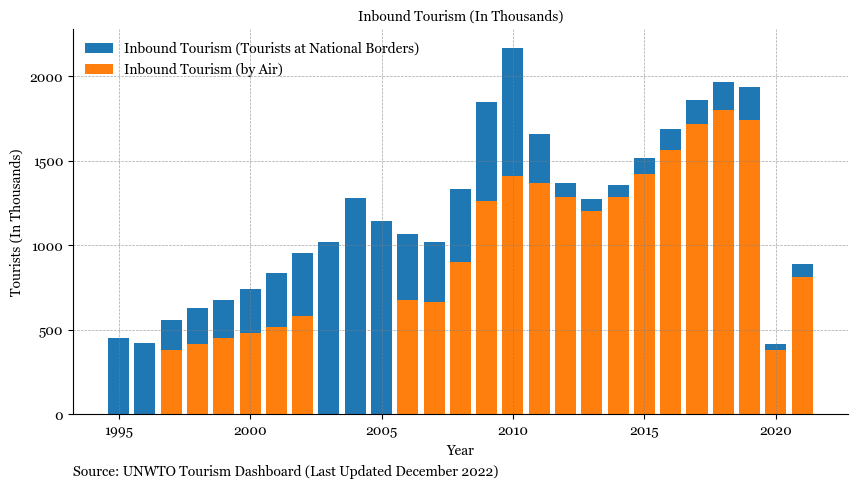

In [242]:
fig, ax = plt.subplots(figsize = (10,5))
plt.rcParams["font.family"] = "Georgia"
# inbound_tourism.plot(ax=ax, label = 'Inbound Tourism')
# inbound_tourism_by_air.plot(ax=ax)

ax.bar(x=inbound_tourism.index, height = inbound_tourism['Inbound Tourism (Total)'], label = 'Inbound Tourism (Tourists at National Borders)')
ax.bar(x=inbound_tourism_by_air.index, height = inbound_tourism_by_air['Inbound Tourism (by Air)'], label = 'Inbound Tourism (by Air)')

legend_without_title = ax.legend(title=None, loc='upper left', frameon=False)

# Hide the right and top spines (axis lines)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

ax.set_title('Inbound Tourism (In Thousands)', font = 'Georgia')
ax.set_xlabel('Year')
ax.set_ylabel('Tourists (In Thousands)')

subtitle = 'Source: UNWTO Tourism Dashboard (Last Updated December 2022)'
ax.text(0, -0.15, subtitle, ha='left', va='center', transform=ax.transAxes,
        fontsize=10, color='black', weight='normal');


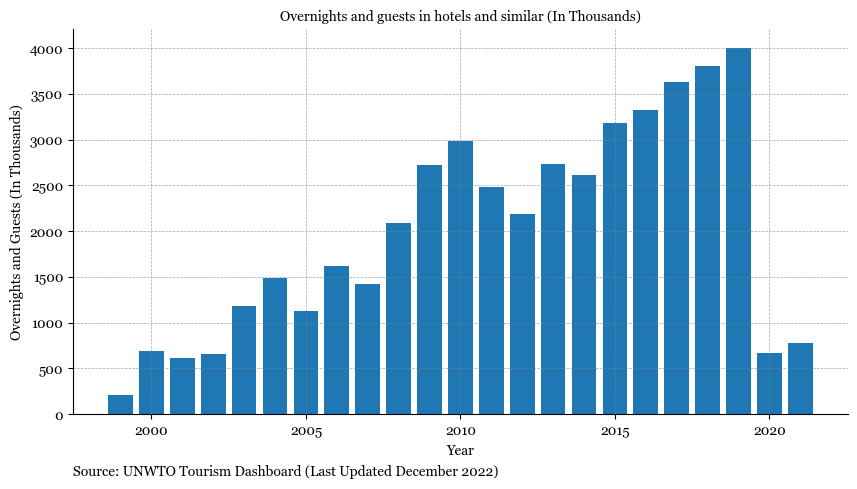

In [243]:
fig, ax = plt.subplots(figsize = (10,5))
plt.rcParams["font.family"] = "Georgia"
# inbound_tourism.plot(ax=ax, label = 'Inbound Tourism')
# inbound_tourism_by_air.plot(ax=ax)

ax.bar(x=hotel_occupancy['Year'], height = hotel_occupancy['Total Accommodation'])

#legend_without_title = ax.legend(title=None, loc='upper left', frameon=False)

# Hide the right and top spines (axis lines)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

ax.set_title('Overnights and guests in hotels and similar (In Thousands)', font = 'Georgia')
ax.set_xlabel('Year')
ax.set_ylabel('Overnights and Guests (In Thousands)');

subtitle = 'Source: UNWTO Tourism Dashboard (Last Updated December 2022)'
ax.text(0, -0.15, subtitle, ha='left', va='center', transform=ax.transAxes,
        fontsize=10, color='black', weight='normal');